In [4]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt

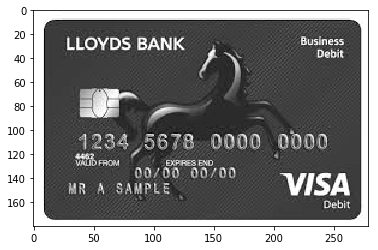

In [94]:
image = cv2.imread('../data/samples/card1.jpeg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

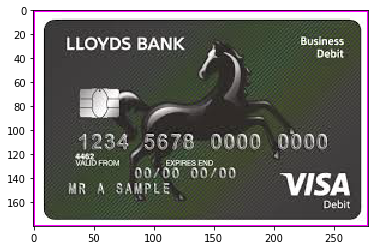

In [113]:
image = cv2.imread('../data/samples/card1.jpeg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3, 3))
dilated = cv2.dilate(thresh, kernel, iterations = 10)
# plt.imshow(dilated)

_, contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    # get rectangle bounding contour
    [x, y, w, h] = cv2.boundingRect(contour)

    # discard areas that are too large
    if h > 300 and w > 300:
        continue

    # discard areas that are too small
    if h < 20 or w < 20:
        continue

    # draw rectangle around contour on original image
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 255), 2)
plt.imshow(image)
# write original image with added contours to disk  
# cv2.imwrite('../data/output/card1.jpg', image) 